## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

Read the .csv file and store it in a Pandas dataframe

In [5]:
df = pd.read_csv("QueryResults.csv", names = ['DATE', 'TAG', 'POSTS'], header=0)
df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164
...,...,...,...
2644,2024-06-01 00:00:00,php,1098
2645,2024-06-01 00:00:00,python,5689
2646,2024-06-01 00:00:00,r,1160
2647,2024-06-01 00:00:00,ruby,116


Examine the first 5 rows and the last 5 rows of the of the dataframe

In [6]:
df.head()
# df.tail()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [7]:
df.shape

(2649, 3)

Count the number of entries in each column of the dataframe

In [8]:
df.count()

DATE     2649
TAG      2649
POSTS    2649
dtype: int64

Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [9]:
df.groupby("TAG")["POSTS"].sum()

TAG
assembly        44564
c              405127
c#            1618599
c++            808921
delphi          52051
go              73335
java          1918612
javascript    2530856
perl            68151
php           1465722
python        2200444
r              507540
ruby           229145
swift          334289
Name: POSTS, dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

How many months of data exist per language? Which language had the fewest months with an entry?


In [49]:
df['DATE'] = pd.to_datetime(df['DATE'])
result = df.groupby('TAG').agg(
    Earliest=('DATE', 'min'),
    Latest=('DATE', 'max'),
).reset_index()

# print(result)
result['DurationDays'] = (result['Latest'] - result['Earliest']).dt.days
result['DurationMonths'] = result['DurationDays'] // 30
print(result)
# go has the least month of data
# or do the following because the date is updated every month
df.groupby("TAG").count()

           TAG   Earliest     Latest  DurationDays  DurationMonths
0     assembly 2008-08-01 2024-06-01          5783             192
1            c 2008-08-01 2024-06-01          5783             192
2           c# 2008-07-01 2024-06-01          5814             193
3          c++ 2008-08-01 2024-06-01          5783             192
4       delphi 2008-08-01 2024-06-01          5783             192
5           go 2009-11-01 2024-06-01          5326             177
6         java 2008-08-01 2024-06-01          5783             192
7   javascript 2008-08-01 2024-06-01          5783             192
8         perl 2008-08-01 2024-06-01          5783             192
9          php 2008-08-01 2024-06-01          5783             192
10      python 2008-08-01 2024-06-01          5783             192
11           r 2008-09-01 2024-06-01          5752             191
12        ruby 2008-08-01 2024-06-01          5783             192
13       swift 2009-01-01 2024-06-01          5630            

,DATE,POSTS
TAG,,
assembly,191,191
c,191,191
c#,192,192
c++,191,191
delphi,191,191
go,176,176
java,191,191
javascript,191,191
perl,191,191


## Data Cleaning

Fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [11]:
type(df['DATE'][1])

pandas._libs.tslibs.timestamps.Timestamp

## Data Manipulation



In [13]:
# test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
#                         'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
#                         'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
# print(test_df)
# pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
# pivoted_df
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,503.0,164.0,13.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1128.0,634.0,130.0,474.0,536.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,806.0,112.0,NaN,1148.0,722.0,128.0,604.0,506.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,581.0,97.0,497.0,448.0,1.0,157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01,132.0,762.0,2686.0,1434.0,110.0,304.0,2765.0,4721.0,36.0,1296.0,7783.0,1822.0,157.0,667.0
2024-03-01,139.0,735.0,2583.0,1336.0,98.0,324.0,2821.0,4715.0,47.0,1360.0,7368.0,1686.0,139.0,721.0
2024-04-01,184.0,735.0,2725.0,1308.0,106.0,302.0,2571.0,4249.0,26.0,1175.0,7335.0,1532.0,114.0,687.0


What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [14]:
reshaped_df.shape

(192, 14)

In [17]:
reshaped_df.head()
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2024-02-01,132.0,762.0,2686.0,1434.0,110.0,304.0,2765.0,4721.0,36.0,1296.0,7783.0,1822.0,157.0,667.0
2024-03-01,139.0,735.0,2583.0,1336.0,98.0,324.0,2821.0,4715.0,47.0,1360.0,7368.0,1686.0,139.0,721.0
2024-04-01,184.0,735.0,2725.0,1308.0,106.0,302.0,2571.0,4249.0,26.0,1175.0,7335.0,1532.0,114.0,687.0
2024-05-01,179.0,667.0,2488.0,1433.0,101.0,270.0,2276.0,3998.0,38.0,1153.0,6907.0,1377.0,117.0,616.0
2024-06-01,96.0,563.0,2107.0,1245.0,75.0,255.0,2094.0,3339.0,35.0,1098.0,5689.0,1160.0,116.0,662.0


In [18]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

Count the number of entries per programming language. Why might the number of entries be different?

In [20]:
# count the number of entries per column
reshaped_df.count()

TAG
assembly      191
c             191
c#            192
c++           191
delphi        191
go            176
java          191
javascript    191
perl          191
php           191
python        191
r             189
ruby          191
swift         182
dtype: int64

In [21]:
reshaped_df.fillna(0, inplace=True)

In [22]:
# successfully filled in the NaN without dropping entries
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,503.0,164.0,13.0,0.0,222.0,163.0,28.0,157.0,119.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1128.0,634.0,130.0,474.0,536.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,806.0,112.0,0.0,1148.0,722.0,128.0,604.0,506.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,734.0,140.0,0.0,954.0,581.0,97.0,497.0,448.0,1.0,157.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01,132.0,762.0,2686.0,1434.0,110.0,304.0,2765.0,4721.0,36.0,1296.0,7783.0,1822.0,157.0,667.0
2024-03-01,139.0,735.0,2583.0,1336.0,98.0,324.0,2821.0,4715.0,47.0,1360.0,7368.0,1686.0,139.0,721.0
2024-04-01,184.0,735.0,2725.0,1308.0,106.0,302.0,2571.0,4249.0,26.0,1175.0,7335.0,1532.0,114.0,687.0


In [23]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

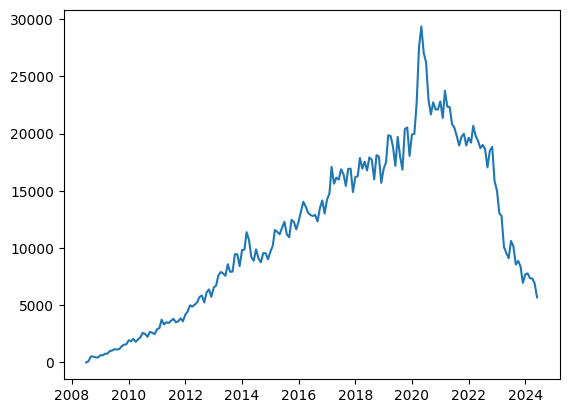

In [33]:
plt.plot(reshaped_df.index, reshaped_df["python"])

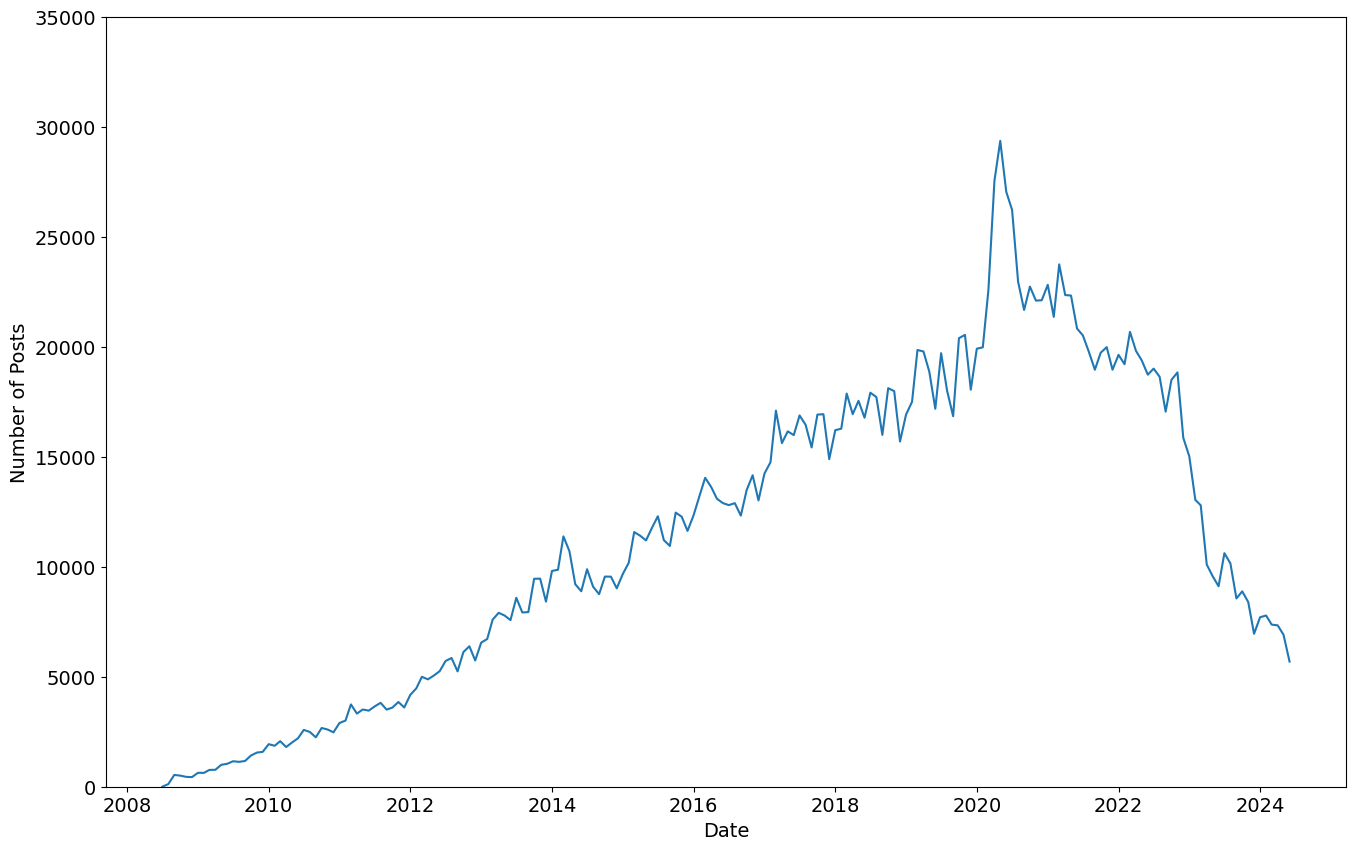

In [36]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df["python"])

Show two line (e.g. for Java and Python) on the same chart.

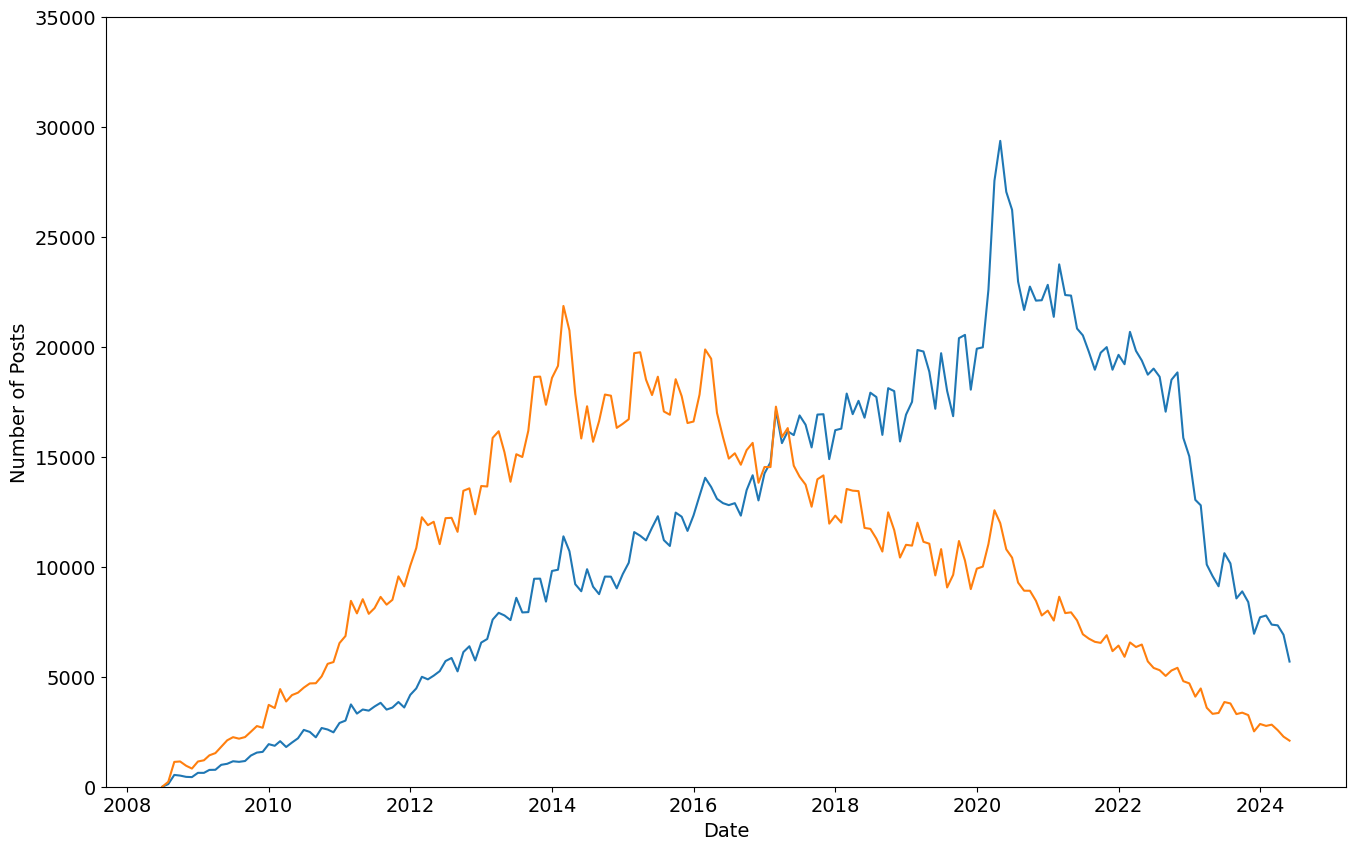

In [38]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['python'], reshaped_df.index, reshaped_df['java'])

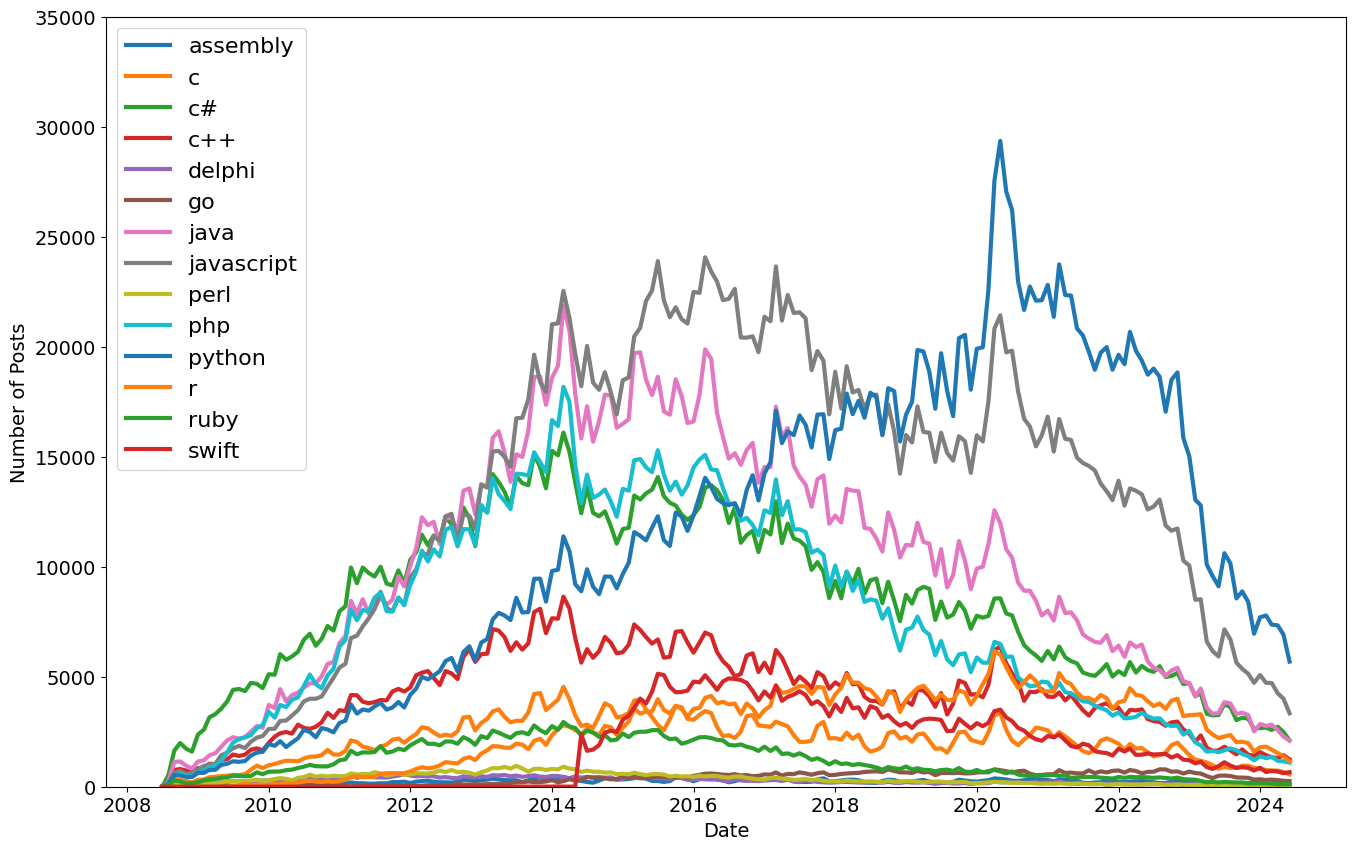

In [42]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
  # print(reshaped_df[column].name)
  plt.plot(reshaped_df.index, reshaped_df[column],
            linewidth=3, label=reshaped_df[column].name)
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

In [47]:
roll_df = reshaped_df.rolling(window=12).mean()

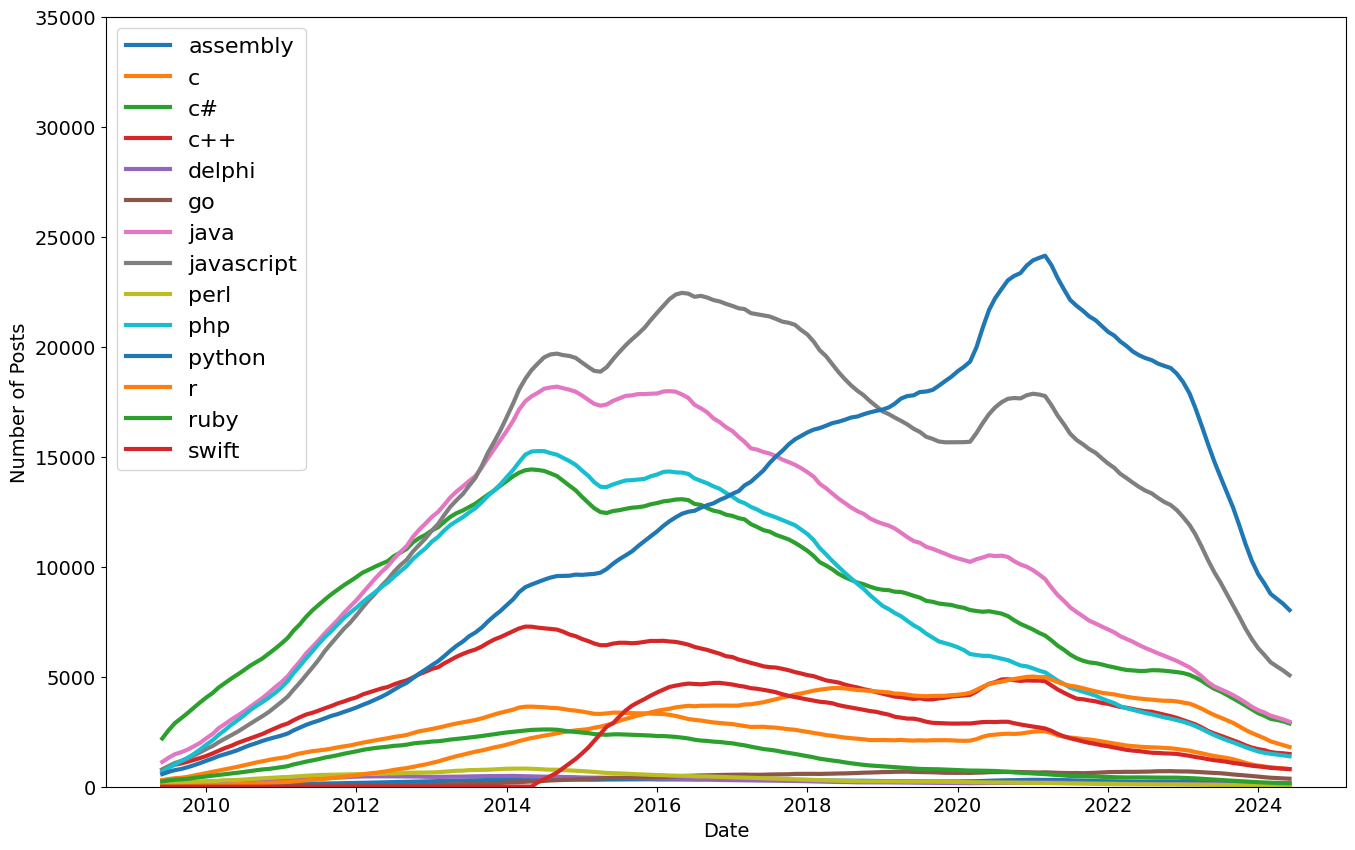

In [48]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in roll_df.columns:
  # print(reshaped_df[column].name)
  plt.plot(roll_df.index, roll_df[column],
            linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)